In [17]:
# BatchNormalizationを追加
# 各バッチごとに層の出力を正規化する。平均を０、標準偏差が１になるように行う
# これを行うことにより、学習が早く進み、また過学習を抑制することができる
# 今回は、これを行ったところ学習がうまく進まなくなった。使用方法が間違っているように感じる。
# 課題5で精度向上のためにBatchNormalizationを使用した感覚では、今回のケースではレイヤー数が少なすぎたように思える。
# 実行時間は長くなったし、精度ももとより下がってしまった。

In [1]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()


Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


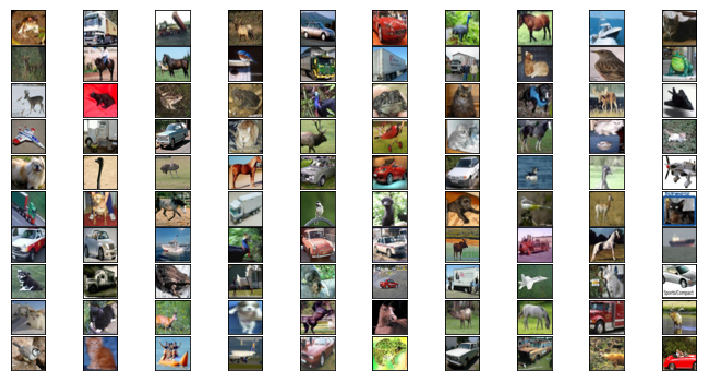

In [3]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i].reshape((32,32,3)))
    

In [4]:
from keras.utils import np_utils
nb_classes = 10


In [5]:
# 画像を1次元配列化
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


(50000, 'train samples')
(10000, 'test samples')


In [6]:
# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

In [16]:
model = Sequential()

model.add(Dense(512,input_shape=(3072,)))
model.add(BatchNormalization(epsilon=1e-07))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(BatchNormalization(epsilon=1e-07))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

In [18]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [19]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
3s - loss: 1.6292 - acc: 0.4232 - val_loss: 2.0577 - val_acc: 0.3364
Epoch 2/20
2s - loss: 1.3883 - acc: 0.5049 - val_loss: 2.2553 - val_acc: 0.2714
Epoch 3/20
2s - loss: 1.2634 - acc: 0.5519 - val_loss: 1.6061 - val_acc: 0.4312
Epoch 4/20
2s - loss: 1.1760 - acc: 0.5833 - val_loss: 1.6501 - val_acc: 0.4218
Epoch 5/20
2s - loss: 1.0904 - acc: 0.6160 - val_loss: 1.6215 - val_acc: 0.4338
Epoch 6/20
2s - loss: 1.0184 - acc: 0.6396 - val_loss: 1.6709 - val_acc: 0.4394
Epoch 7/20
2s - loss: 0.9423 - acc: 0.6701 - val_loss: 1.6903 - val_acc: 0.4040
Epoch 8/20
2s - loss: 0.8736 - acc: 0.6925 - val_loss: 1.7229 - val_acc: 0.4432
Epoch 9/20
2s - loss: 0.7947 - acc: 0.7198 - val_loss: 1.9145 - val_acc: 0.4216
Epoch 10/20
2s - loss: 0.7222 - acc: 0.7488 - val_loss: 1.6491 - val_acc: 0.4800
Epoch 11/20
2s - loss: 0.6572 - acc: 0.7719 - val_loss: 2.1450 - val_acc: 0.4234
Epoch 12/20
2s - loss: 0.5898 - acc: 0.7959 - val_loss: 2.2026 - val_

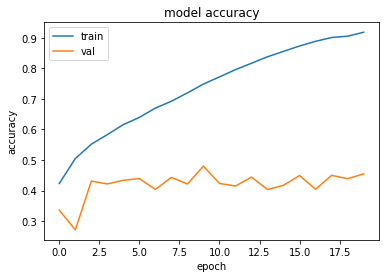

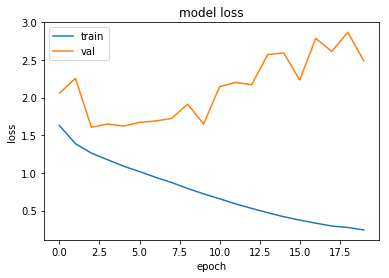

In [20]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.4398


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[174  34  29  43  21  36  17  18 504 124]
 [ 11 602  12  25  10  23  16   8 131 162]
 [ 18  20 276 127  84 163  64  48 164  36]
 [ 10  28  61 331  46 286  54  42  92  50]
 [ 10  14 103 109 320 152  81  54 121  36]
 [  6  11  64 204  38 501  33  42  82  19]
 [  1  21  62 149  60 150 450  11  60  36]
 [  9  29  54  96  83 155  20 396  71  87]
 [ 12  53  11  31   8  24   6   2 807  46]
 [  2 176  30  39  12  33  17  12 138 541]]
             precision    recall  f1-score   support

          0       0.69      0.17      0.28      1000
          1       0.61      0.60      0.61      1000
          2       0.39      0.28      0.32      1000
          3       0.29      0.33      0.31      1000
          4       0.47      0.32      0.38      1000
          5       0.33      0.50      0.40      1000
          6       0.59      0.45      0.51      1000
          7       0.63      0.40      0.48      1000
          8       0.37      0.81      0.51      1000
          9       0.48      0.54      